# Johnny's Movie Ratings'

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

Firt, we import the movie rating csv.

In [44]:
ratings = pd.read_csv('https://raw.githubusercontent.com/johnnymango/IS362stuff/master/ratings.csv')
ratings

,Unnamed: 0,Johnny,Keyla,Kleber,Emily,Brenda
0,Get Out,5.0,5.0,4.0,3.0,4
1,Skull Island,3.0,4.0,NaN,4.0,4
2,Prometheus,4.0,3.0,3.0,2.0,3
3,Dr. Strange,NaN,NaN,5.0,5.0,5
4,Sausage Party,5.0,5.0,5.0,NaN,2
5,Rogue One,4.0,4.0,4.0,3.0,4


To clean up the dataframe, I label the missing movie column.  To help with the calculations, I also set the movie column as the index.

In [45]:
ratings.columns = ['movie', 'johnny', 'keyla','kleber','emily', 'brenda']
ratings.set_index('movie', inplace = True)
ratings

,johnny,keyla,kleber,emily,brenda
movie,,,,,
Get Out,5.0,5.0,4.0,3.0,4
Skull Island,3.0,4.0,NaN,4.0,4
Prometheus,4.0,3.0,3.0,2.0,3
Dr. Strange,NaN,NaN,5.0,5.0,5
Sausage Party,5.0,5.0,5.0,NaN,2
Rogue One,4.0,4.0,4.0,3.0,4


The mean per movie and per person using the standard rating yields these results.  For movies, Dr. Strange had the best score. Johnny, Keyla, and Emily rated movies the same way.

In [46]:
ratings.mean(axis=1)

movie
Get Out          4.20
Skull Island     3.75
Prometheus       3.00
Dr. Strange      5.00
Sausage Party    4.25
Rogue One        3.80
dtype: float64

In [47]:
ratings.mean()

johnny    4.200000
keyla     4.200000
kleber    4.200000
emily     3.400000
brenda    3.666667
dtype: float64

To calculated the normalized values, I apply the following calculation.  

In [48]:
normalized = (ratings - ratings.mean()) / (ratings.max() - ratings.min())
normalized

,johnny,keyla,kleber,emily,brenda
movie,,,,,
Get Out,0.4,0.4,-0.1,-0.133333,0.111111
Skull Island,-0.6,-0.1,NaN,0.200000,0.111111
Prometheus,-0.1,-0.6,-0.6,-0.466667,-0.222222
Dr. Strange,NaN,NaN,0.4,0.533333,0.444444
Sausage Party,0.4,0.4,0.4,NaN,-0.555556
Rogue One,-0.1,-0.1,-0.1,-0.133333,0.111111


The results from the normalized dataframe are a bit harder to interpret due to the scaling of the new numbers.  The  results for the movie are similar -- Dr Strange winning out.  The results for the person's average rating are not; in this case, Brenda seems to have the highest scores.

In [49]:
normalized.mean(axis = 1)

movie
Get Out          0.135556
Skull Island    -0.097222
Prometheus      -0.397778
Dr. Strange      0.459259
Sausage Party    0.161111
Rogue One       -0.064444
dtype: float64

In [50]:
normalized.mean()

johnny   -8.881784e-17
keyla    -8.881784e-17
kleber   -8.881784e-17
emily     2.220446e-17
brenda    5.551115e-17
dtype: float64

To help visualize and confirm the results, I plotted the normalized movie ratings and confirms Dr. Strange is the best scored.

In [51]:
norm_movies = normalized.mean(axis=1)
norm_movies

movie
Get Out          0.135556
Skull Island    -0.097222
Prometheus      -0.397778
Dr. Strange      0.459259
Sausage Party    0.161111
Rogue One       -0.064444
dtype: float64

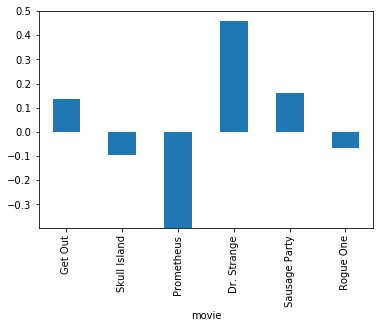

In [52]:
norm_movies.plot(kind = 'bar');
plt.show()

The plot for the normalized person data indicates Brenda is the best rater.

In [53]:
norm_person = normalized.mean()
norm_person

johnny   -8.881784e-17
keyla    -8.881784e-17
kleber   -8.881784e-17
emily     2.220446e-17
brenda    5.551115e-17
dtype: float64

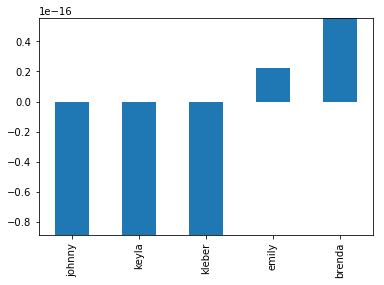

In [54]:
norm_person.plot(kind = 'bar');
plt.show()